In [133]:
####################################
#      DATA SCIENCE BOOTCAMP       #
#       TASK-5B-5C-5D.ipynb        #
# Author    : Çağatay KARASU       #
####################################

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import seaborn as sns
import os
if not os.path.exists('figures'):
    os.makedirs('figures')
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB                           
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import NearestCentroid
from sklearn.datasets import load_digits

**TASK-5B: Please give concrete examples for each of the 4 domains of machine learning including classification, regression, clustering, and dimensionality reduction.**

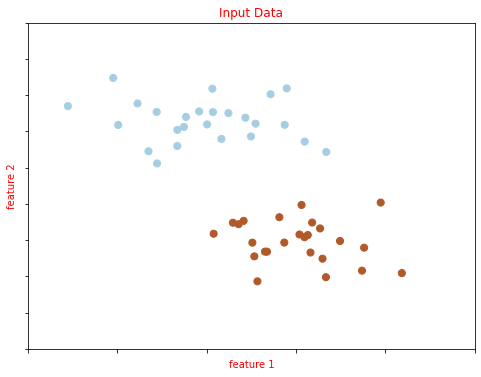

In [134]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='red')
    ax.set_ylabel('feature 2', color='red')
    ax.set_title(title, color='red')

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-1.png')

> feature 1 --> otomobil motor hacmi

> feature 2 --> 0'dan 100km hıza geçiş süresi



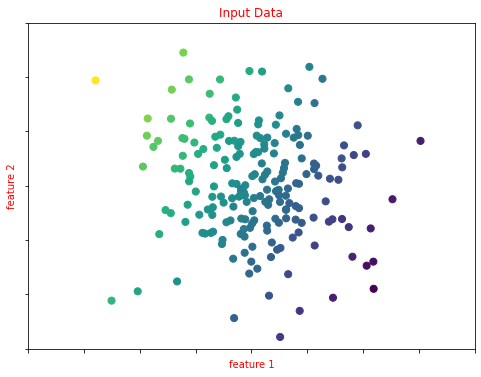

In [135]:
# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

# plot data points
fig, ax = plt.subplots(figsize=(8, 6))
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

fig.savefig('figures/05.01-regression-1.png')

> feature 1 --> yaş

> feature 2 --> grip hastalığına yakalanma miktarı

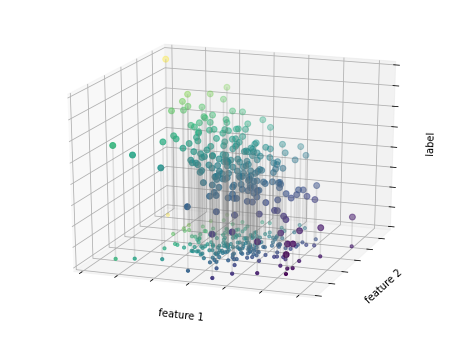

In [136]:
points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

fig.savefig('figures/05.01-regression-2.png')

> feature 1 --> mesleki kariyer süresi

> feature 2 --> alınan maaş miktarı

> label --> ev satın alabilme gücü

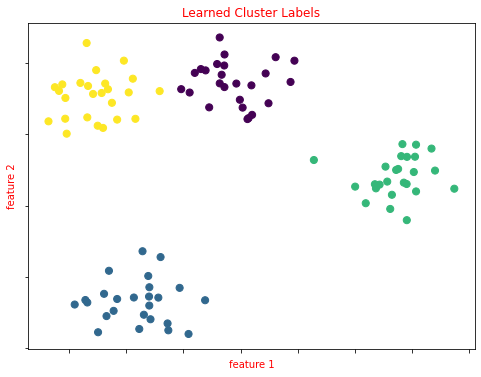

In [137]:
# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

fig.savefig('figures/05.01-clustering-2.png')

> feature 1 --> kripto para piyasasına ait 4 adet coinin alış miktarları

> feature 2 --> kripto para piyasasına ait 4 adet coinin satış miktarları

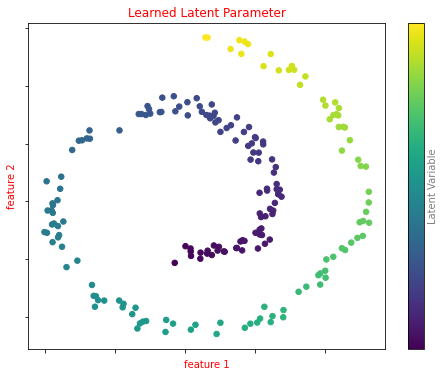

In [145]:
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots(figsize=(8, 6))
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')

fig.savefig('figures/05.01-dimesionality-2.png')

> feature 1 --> samanyolu galaksisi içerisindeki yıldız yoğunluğu

> feature 2 --> samanyolu galaksisi içerisindeki gaz/toz bulut yoğunluğu

**TASK-5C: Please run the GaussianNB algorithm for 20 different values with respect to varr_smoothing parameter to find the best model. Then please visualize your findings via a lineplot (matplotlib) to illustrate the more appropriate values/ranges.**

In [140]:
iris = sns.load_dataset('iris')

x_iris= iris.drop('species', axis=1)
print("shape of X_iris:",x_iris.shape)

y_iris = iris['species']
print("shape of Y_iris:",y_iris.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=0)

temp_list = []
temp_nums = sorted(random.rand(20),reverse=False)
for i in temp_nums:
  print("number is : ", i)
  model = GaussianNB(var_smoothing = i)
  model.fit(Xtrain, ytrain)
  y_model = model.predict(Xtest)
  ascore = accuracy_score(ytest, y_model)
  temp_list.append(ascore)

temp_list = sorted(temp_list,reverse=False)

for i in range (len(temp_list)):
  print("list_1: ", temp_list[i])

shape of X_iris: (150, 4)
shape of Y_iris: (150,)
number is :  0.03170754978676804
number is :  0.12437490238259119
number is :  0.15649579313399997
number is :  0.1666783376259927
number is :  0.20727312876493398
number is :  0.22039071767946317
number is :  0.24788367633378117
number is :  0.3189974983250139
number is :  0.33794799486314797
number is :  0.48999495043559216
number is :  0.5972375496856276
number is :  0.6001765832799767
number is :  0.6587317681954907
number is :  0.7125919336835544
number is :  0.7478444002776221
number is :  0.8143213588841172
number is :  0.8514430262735028
number is :  0.8952201459907401
number is :  0.8984793064669849
number is :  0.9076738604183823
list_1:  0.868421052631579
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.8947368421052632
list_1:  0.894736842105

In [141]:
max_acc = max(temp_list)
min_acc = min(temp_list)
print("Best accuracy is: ",max_acc)
print("Lowest accuracy is: ",min_acc)

Best accuracy is:  1.0
Lowest accuracy is:  0.868421052631579


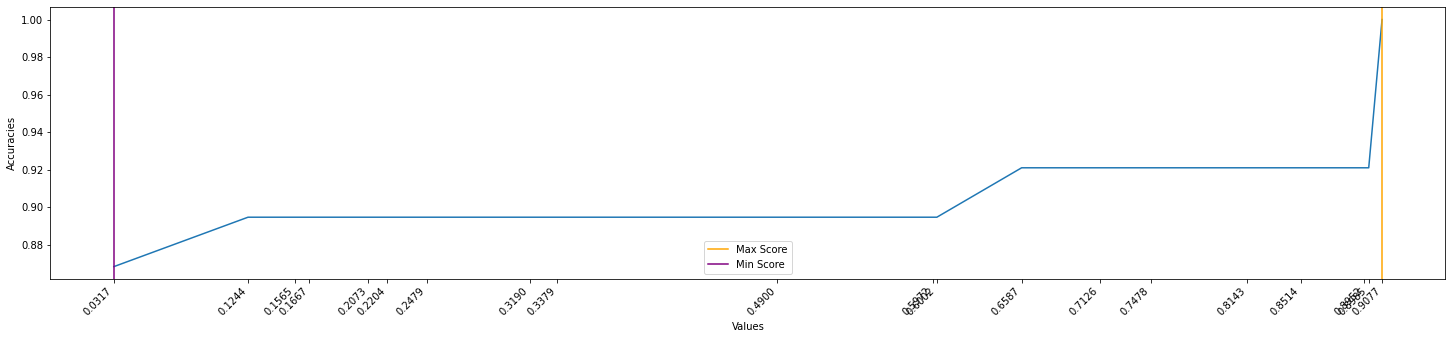

In [142]:
plt.figure(figsize=(25, 5))
plt.plot(temp_nums,temp_list)
plt.axvline(temp_nums[temp_list.index(max(temp_list))],color="orange",label="Max Score")
plt.axvline(temp_nums[temp_list.index(min(temp_list))],color="purple",label="Min Score")
plt.legend(loc = 'best') 
plt.xticks(temp_nums)
plt.ylabel("Accuracies")
plt.xlabel("Values")
plt.xticks(rotation=45, ha='right')
plt.show()

**TASK-5D: Please use two different algorithms (other than GaussianNB) with their default parameter values and then compare your findings to the ones obtained in Task-5C.**

In [146]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
                         
model = tree.DecisionTreeClassifier()
model.fit(Xtrain, ytrain)             
y_model = model.predict(Xtest)           

dec_tree_acc = (accuracy_score(ytest, y_model))
print(dec_tree_acc)

0.9736842105263158


In [147]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
                         
model = NearestCentroid()
model.fit(Xtrain, ytrain)             
y_model = model.predict(Xtest)           

nea_cent_acc = (accuracy_score(ytest, y_model))
print(nea_cent_acc)

0.9736842105263158
